In [1]:
using CSV
using DataFrames
using Plots
using LaTeXStrings
using StatsPlots
gr()

Plots.GRBackend()

In [84]:
base_dir = "C:/Users/hayde/Desktop/University_of_Southampton_files/2024-2025_Summer_research/GPU_CFD_solver/HPC_testing/Benchmarking";
CPU_data_dir = "$(base_dir)/kCPU_data";
GPU_data_dir = "$(base_dir)/kGPU_M_data_indigo58";
GPU_data_dir2 = "$(base_dir)/kGPU_M_data2";
isotest_dir = "$(base_dir)/function_isotests";
GPU_usage_dir = "$(base_dir)/GPU_usage";

In [85]:
lens = [30, 70, 80, 100, 128, 160, 200, 256, 300, 350, 400, 450, 512, 650, 800, 896];
padded_lens = [45, 105, 120, 150, 192, 240, 300, 384, 450, 525, 600, 675, 768, 975, 1200, 1344];

In [86]:
samples_per_test = 200;
iters_per_test = 1000;
num_tests = size(lens, 1);


In [87]:
CPU_times = Array{Float64}(repeat([0.0], num_tests, samples_per_test));
GPU_times = Array{Float64}(repeat([0.0], num_tests, samples_per_test));

GPU_times2 = Array{Float64}(repeat([0.0], num_tests, samples_per_test));

In [88]:
1:samples_per_test

1:200

In [89]:
for i in 1:num_tests
    CPU_dframe = CSV.read("$(CPU_data_dir)/kCPU_$(lens[i])x$(lens[i]).csv", DataFrame);
    view(CPU_times, i, 1:samples_per_test) .= CPU_dframe[!, 2];

    GPU_dframe = CSV.read("$(GPU_data_dir)/kGPU_M_$(padded_lens[i])x$(padded_lens[i]).csv", DataFrame);
    view(GPU_times, i, 1:samples_per_test) .= GPU_dframe[!, 2];

    GPU_dframe2 = CSV.read("$(GPU_data_dir2)/kGPU_M_$(padded_lens[i])x$(padded_lens[i]).csv", DataFrame);
    view(GPU_times2, i, 1:samples_per_test) .= GPU_dframe2[!, 2];
end;
    

In [90]:
function calc_stat(data::Array{Float64, 1})
    min = minimum(data) / 1e6;
    max = maximum(data) / 1e6;
    mean = sum(data) / (1e6 * size(data, 1));
    len = size(data, 1)
    if len == 0
        median = (data[div(len, 2)] + data[div(len, 2) + 1]) / (2 * 1e6)
    else
        median = data[div(len, 2) + 1] / (1e6);
    end;
    return [min, max, mean, median]
end;

In [91]:
function calc_data(data::Array{Float64, 2}, sim_sizes::Array)
    stats_arr = Array{Float64}(repeat([0.0], size(data, 1), 6))
    for i in 1:size(data, 1)
        stats_arr[i, 1] = sim_sizes[i];
        stats_arr[i, 2:5] = calc_stat(data[i, 1:size(data, 2)]);
        stats_arr[i, 6] = stats_arr[i, 4] / iters_per_test
    end;
    return stats_arr
end;


In [92]:
CPU_data = calc_data(CPU_times, lens);

In [93]:
GPU_data = calc_data(GPU_times, lens); # reality is padded_lens calculation

In [94]:
GPU_data2 = calc_data(GPU_times2, lens);

In [95]:
cols = ["Size", "min $(iters_per_test) iterations (ms)", "max $(iters_per_test) iterations (ms)", "mean $(iters_per_test) iterations (ms)", "median $(iters_per_test) iterations (ms)", "mean per iteration (ms)"];

In [96]:
DataFrame(CPU_data, cols)

Row,Size,min 1000 iterations (ms),max 1000 iterations (ms),mean 1000 iterations (ms),median 1000 iterations (ms),mean per iteration (ms)
,Float64,Float64,Float64,Float64,Float64,Float64
1,30.0,244.594,246.585,244.957,244.828,0.244957
2,70.0,1364.83,1375.62,1367.79,1368.16,1.36779
3,80.0,1733.4,1741.73,1737.13,1735.9,1.73713
4,100.0,2924.14,2968.79,2937.61,2925.25,2.93761
5,128.0,4659.03,4683.07,4666.29,4664.04,4.66629
6,160.0,7693.55,7728.56,7703.27,7699.74,7.70327
7,200.0,13505.8,14057.3,13839.6,13836.2,13.8396
8,256.0,33626.7,35464.1,34852.7,35230.1,34.8527
9,300.0,55705.2,57168.0,56345.3,56388.2,56.3453


In [97]:
DataFrame(GPU_data, cols)

Row,Size,min 1000 iterations (ms),max 1000 iterations (ms),mean 1000 iterations (ms),median 1000 iterations (ms),mean per iteration (ms)
,Float64,Float64,Float64,Float64,Float64,Float64
1,30.0,599.564,787.68,614.834,606.296,0.614834
2,70.0,599.531,753.956,616.4,607.65,0.6164
3,80.0,600.188,759.388,623.862,633.586,0.623862
4,100.0,629.706,703.013,646.821,634.442,0.646821
5,128.0,627.247,680.874,638.587,639.629,0.638587
6,160.0,622.93,679.126,637.408,631.621,0.637408
7,200.0,625.036,696.521,638.768,644.999,0.638768
8,256.0,644.439,738.423,659.253,662.636,0.659253
9,300.0,589.739,685.738,607.808,595.424,0.607808


In [98]:
DataFrame(GPU_data2, cols)

Row,Size,min 1000 iterations (ms),max 1000 iterations (ms),mean 1000 iterations (ms),median 1000 iterations (ms),mean per iteration (ms)
,Float64,Float64,Float64,Float64,Float64,Float64
1,30.0,1072.49,1126.43,1081.68,1073.84,1.08168
2,70.0,1069.88,1165.32,1078.6,1076.66,1.0786
3,80.0,1050.57,1137.25,1070.3,1086.33,1.0703
4,100.0,1051.68,1127.8,1063.34,1061.37,1.06334
5,128.0,1056.92,1148.5,1066.36,1060.89,1.06636
6,160.0,1069.93,1139.63,1078.88,1078.46,1.07888
7,200.0,1070.99,1141.97,1079.87,1072.74,1.07987
8,256.0,1097.58,1182.45,1107.32,1104.76,1.10732
9,300.0,1097.29,1184.16,1106.64,1106.83,1.10664


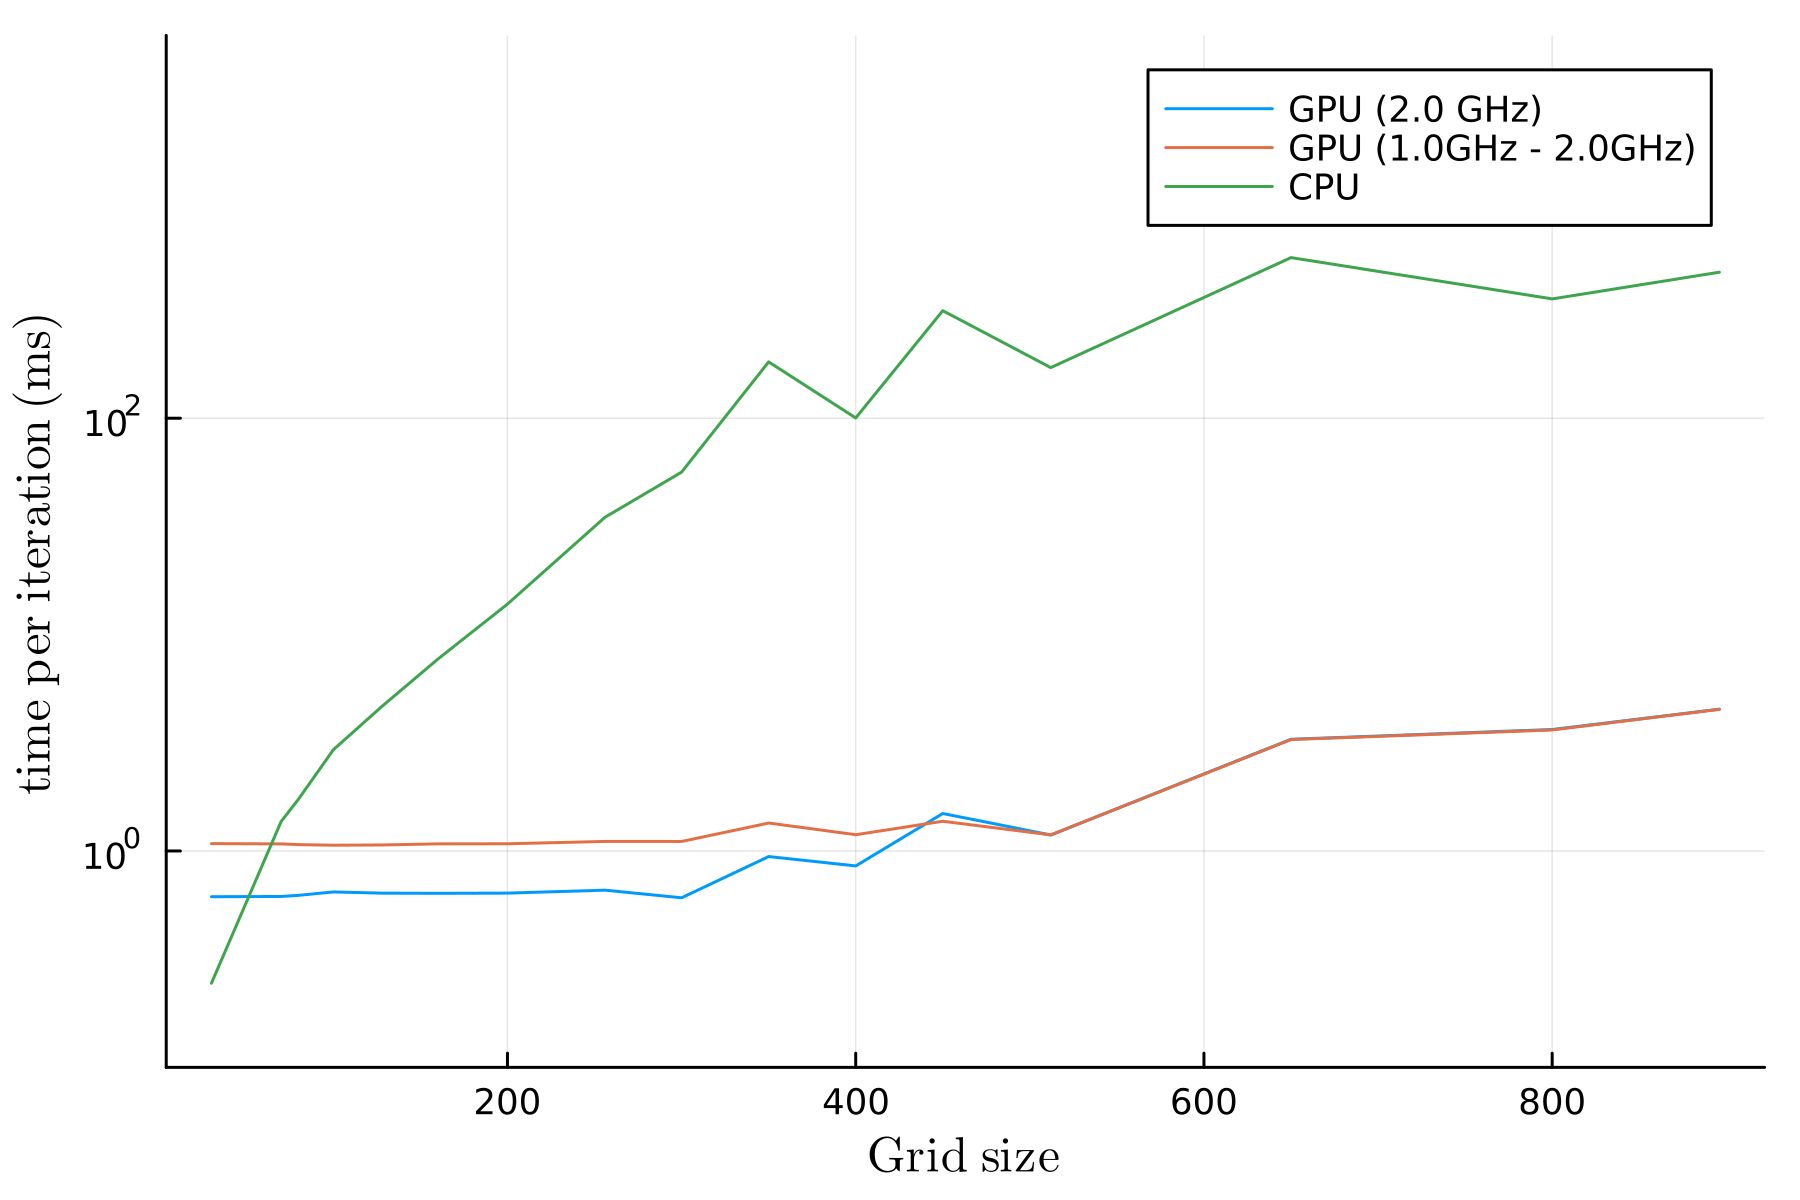

In [113]:
plot(GPU_data[:, 1], GPU_data[:, 6], label="GPU (2.0 GHz)", yscale=:log10, ylims=(0.1, maximum(CPU_data) * 0.01), dpi=300)
plot!(GPU_data2[:, 1], GPU_data2[:, 6], label="GPU (1.0GHz - 2.0GHz)")
plot!(CPU_data[:, 1], CPU_data[:, 6], label="CPU")
xlabel!(L"\textsf{Grid\ size}")
ylabel!(L"\textsf{time\ per\ iteration\ (ms)}")
#savefig("GPU,CPU_time_plot.png")

In [100]:
N = copy(CPU_data[:, 1]);

NlogN2 = (N .* log10.(N)).^2;

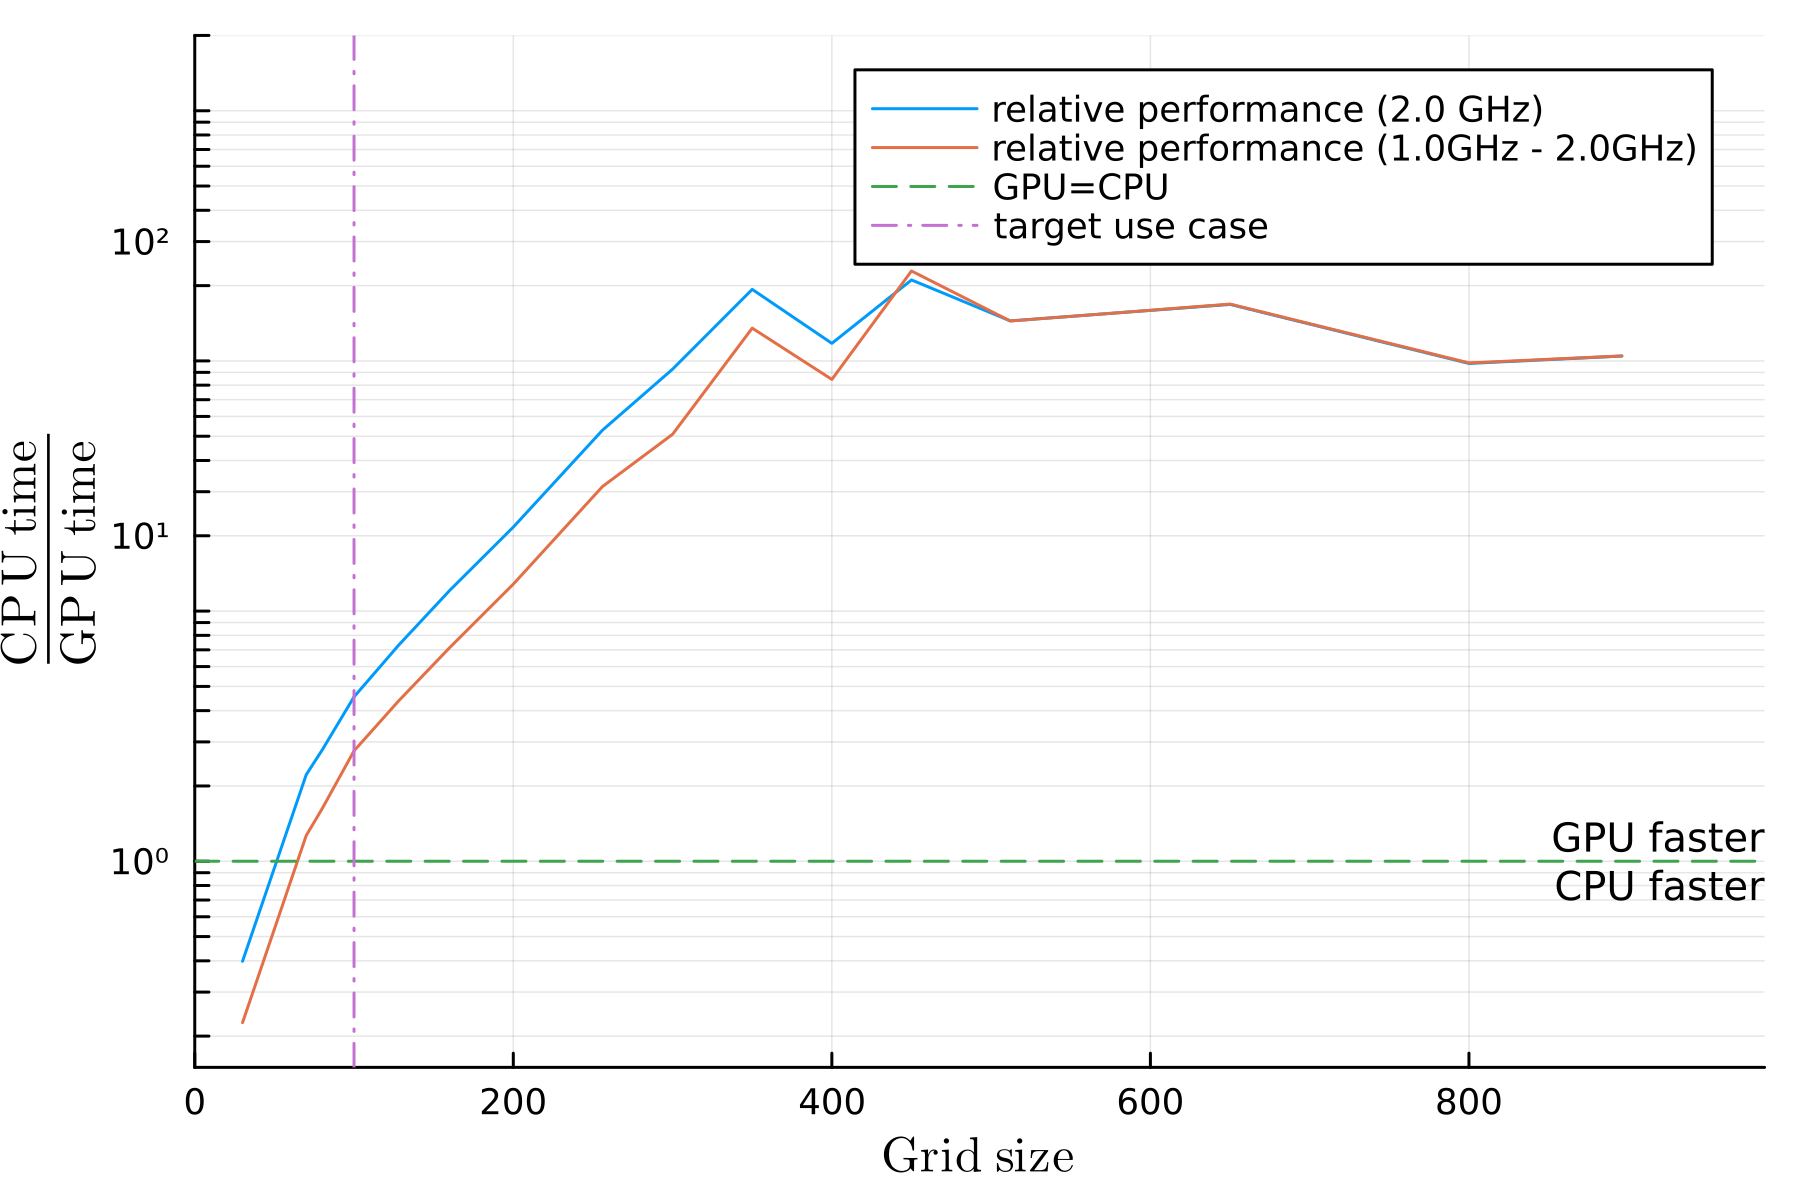

In [104]:
right_lim = maximum(lens) * 1.1;

yticks1 = vcat(LinRange(0.2, 1, 9), LinRange(2, 10, 9), LinRange(20, 100, 9), LinRange(200, 1000, 9), LinRange(2000, 10000, 9))
empty_space = repeat([""], 9);
yticks_arr = vcat(repeat([""], 8), ["10⁰"], empty_space, ["10¹"], empty_space, ["10²"], empty_space, ["10³"], empty_space, ["10⁴"])

plot(N, CPU_data[:, 6] ./ GPU_data[:, 6], label="relative performance (2.0 GHz)", yscale=:log10, ylim=[0.15, 2000], xlim=[0.0, right_lim], dpi=300, yticks=(yticks1, yticks_arr))
plot!(N, CPU_data[:, 6] ./ GPU_data2[:, 6], label="relative performance (1.0GHz - 2.0GHz)")
hline!([1], label="GPU=CPU", linestyle=:dash)
vline!([100], label="target use case", linestyle=:dashdot)
xlabel!(L"\textsf{Grid\ size}")
ylabel!(L"$\frac{\textsf{CPU\ time}}{\textsf{GPU\ time}}$")
annotate!(right_lim, 1.25, text("GPU faster", :black, :right, 9))
annotate!(right_lim, 0.8, text("CPU faster", :black, :right, 9))
#savefig("GPUvCPU_relative_performance.png")

In [102]:
CPU_mean_per_iter = sum(CPU_data[:, 6] ./ NlogN2) / size(CPU_data[:, 6], 1)
GPU_i58_mean_per_iter = sum(GPU_data[:, 6] ./ NlogN2) / size(GPU_data[:, 6], 1)
GPU_i5X_mean_per_iter = sum(GPU_data[:, 6] ./ NlogN2) / size(GPU_data[:, 6], 1)

2.6177009119530394e-5

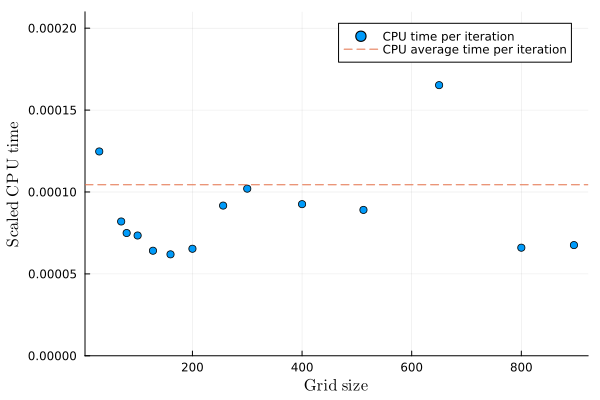

In [21]:
scatter(CPU_data[:, 1], CPU_data[:, 6] ./ NlogN2, ylim=[0, 2.1e-4], label="CPU time per iteration")
hline!([CPU_mean_per_iter], label="CPU average time per iteration", linestyle=:dash)
xlabel!(L"\textsf{Grid\ size}")
ylabel!(L"\textsf{Scaled\ CPU\ time}")
#savefig("Scaled_CPU_time_plot.png")

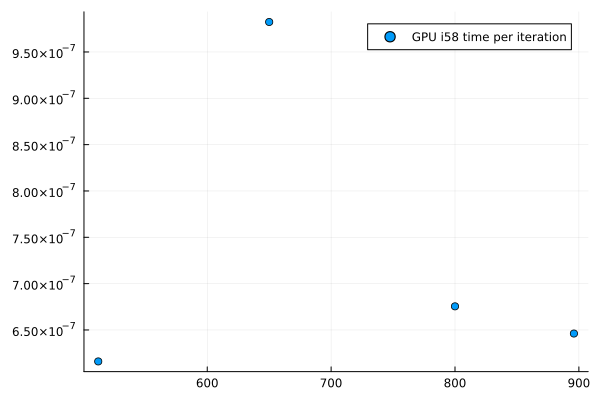

In [22]:
len1 = size(GPU_data, 1)
scatter(GPU_data[len1-3:len1, 1], GPU_data[len1-3:len1, 6] ./ NlogN2[len1 - 3:len1], label="GPU i58 time per iteration")

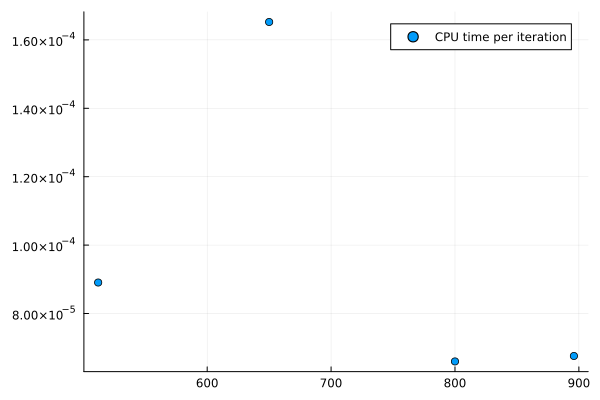

In [23]:
scatter(CPU_data[len1-3:len1, 1], CPU_data[len1-3:len1, 6] ./ NlogN2[len1 - 3:len1], label="CPU time per iteration")

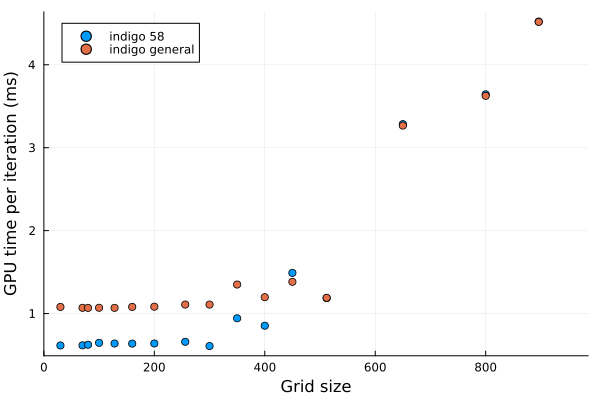

In [24]:
scatter(GPU_data[:, 1], GPU_data[:, 6], xlim=[0, maximum(lens) * 1.1], label="indigo 58")
scatter!(GPU_data2[:, 1], GPU_data2[:, 6], label="indigo general")
xlabel!("Grid size")
ylabel!("GPU time per iteration (ms)")

In [25]:
isotest_usage_file = "$(isotest_dir)/USAGE.log"

isotest_file = readlines(isotest_usage_file);

isotest_usage_data = Array{Int64}(repeat([0], size(isotest_file, 1)))

for i in 1:size(isotest_file, 1)
    isotest_usage_data[i] = parse(Int64, split(split(isotest_file[i], "- ")[2], " ")[1])
end;

In [26]:
conv_starts = [35, 87, 137]
conv_ends = [76, 128, 179]
irfft_starts = []
irfft_ends = []
rfft_starts = []
rfft_ends = []

conv_GPU_usage = Array(repeat([0.0], size(conv_starts, 1)))
irfft_GPU_usage = Array(repeat([0.0], size(irfft_starts, 1)))
rfft_GPU_usage = Array(repeat([0.0], size(rfft_starts, 1)))

for i in 1:size(conv_starts, 1)
    size = conv_ends[i] - conv_starts[i]
    conv_GPU_usage[i] = sum(isotest_usage_data[conv_starts[i]:conv_ends[i]]) / size
end;

for i in 1:size(irfft_starts, 1)
    size = irfft_ends[i] - irfft_starts[i]
    irfft_GPU_usage[i] = sum(isotest_usage_data[irfft_starts[i]:irfft_ends[i]]) / size
end;

for i in 1:size(rfft_starts, 1)
    size = rfft_ends[i] - rfft_starts[i]
    conv_GPU_usage[i] = sum(isotest_usage_data[rfft_starts[i]:rfft_ends[i]]) / size
end;

conv_GPU_usage

3-element Vector{Float64}:
 52.48780487804878
 65.4390243902439
 81.97619047619048

In [56]:
sizes_isotest = [150, 300, 384, 450, 525, 600, 675, 768, 975]#, 1200];
#sizes_isotest = [525, 600, 675, 768, 975, 1200];
num_tests2 = 200;
niter = 1000;

isotest_data = repeat([0.0], 3 * size(sizes_isotest, 1), num_tests2);

for i in 1:size(sizes_isotest, 1)
    dframe = CSV.read("$(isotest_dir)/kGPU_M_$(sizes_isotest[i])x$(sizes_isotest[i])_conv.csv", DataFrame)
    isotest_data[3*i - 2, :] = dframe[!, 2];

    dframe = CSV.read("$(isotest_dir)/kGPU_M_$(sizes_isotest[i])x$(sizes_isotest[i])_irfft.csv", DataFrame)
    isotest_data[3*i - 1, :] = dframe[!, 2];

    dframe = CSV.read("$(isotest_dir)/kGPU_M_$(sizes_isotest[i])x$(sizes_isotest[i])_rfft.csv", DataFrame)
    isotest_data[3*i, :] = dframe[!, 2];
end;



In [57]:
sizes = repeat([0.0], 3 * size(sizes_isotest, 1))

for i in 1:size(sizes_isotest, 1)
    sizes[(3*i-2):(3*i)] .= sizes_isotest[i]
end;

isotest_stats = calc_data(isotest_data, sizes);

In [58]:
isotest_stats

27×6 Matrix{Float64}:
 150.0   215.857     272.361    229.923    222.304   0.229923
 150.0    18.6787     38.8002    20.0591    19.0013  0.0200591
 150.0     6.26296    19.0282    11.0734    11.0826  0.0110734
 300.0   215.226     295.908    233.771    259.046   0.233771
 300.0    18.733      41.471     22.3957    21.8619  0.0223957
 300.0     7.30163    20.817     14.7661    14.7935  0.0147661
 384.0   222.076     285.305    236.994    259.229   0.236994
 384.0    21.9092     44.8801    27.6765    27.3561  0.0276765
 384.0     8.80176    21.2597    17.8094    17.8567  0.0178094
 450.0   223.418     280.173    236.208    228.088   0.236208
 450.0    22.3008     53.451     28.2278    27.829   0.0282278
 450.0     8.55785    23.718     17.2579    17.3189  0.0172579
 525.0   412.439     446.585    421.65     419.977   0.42165
   ⋮                                                 ⋮
 600.0   360.051     405.253    381.195    387.117   0.381195
 600.0    44.4087     84.1669    50.4474    50.2

In [59]:
function calc_rel_times(data::Array, sizes::Array, total_times::Array)
    times_array = repeat([0.0], size(sizes, 1), 3)
    prcnt_times = repeat([0.0], size(sizes, 1), 3)
    for i in 1:size(sizes, 1)
        times_array[i, 1] = 8 * isotest_stats[3*i - 1, 6] + 4 * isotest_stats[3*i, 6];
        times_array[i, 2] = 2 * isotest_stats[3*i - 2, 6] - times_array[i, 1];
        times_array[i, 3] = total_times[i] - 2 * data[3*i - 2, 6]

        prcnt_times[i, 1:3] .= times_array[i, 1:3] ./ total_times[i]
    end;
    return (times_array, prcnt_times)
end;

In [60]:
# each iteration has 2x conv, each conv has 4 irfft , 2 rfft
#=
fft_time_150 = 8 * isotest_stats[2, 6] + 4 * isotest_stats[3, 6];
fft_time_300 = 8 * isotest_stats[5, 6] + 4 * isotest_stats[6, 6];
conv_other_time_150 = 2 * isotest_stats[1, 6] - fft_time_150;
conv_other_time_300 = 2 * isotest_stats[4, 6] - fft_time_300;
other_time_150 = GPU_data[4, 6] - 2 * isotest_stats[1, 6];
other_time_300 = GPU_data[7, 6] - 2 * isotest_stats[4, 6];


fft_prcnt_150 = fft_time_150 / GPU_data[4, 6]
fft_prcnt_300 = fft_time_300 / GPU_data[7, 6]
conv_other_prcnt_150 = conv_other_time_150 / GPU_data[4, 6]
conv_other_prcnt_300 = conv_other_time_300 / GPU_data[7, 6]
other_time_prcnt_150 = other_time_150 / GPU_data[4, 6]
other_time_prcnt_300 = other_time_300 / GPU_data[7, 6]

time_prcnt_150 = [fft_prcnt_150, conv_other_prcnt_150, other_time_prcnt_150] .* 100
time_prcnt_300 = [fft_prcnt_300, conv_other_prcnt_300, other_time_prcnt_300] .* 100;
=#

#isotested_times = GPU_data[[4, 7, 8, 9, 10, 11, 12, 13, 14, 15], 6];
isotested_times = GPU_data[[4, 7, 8, 9, 10, 11, 12, 13, 14], 6];
#isotested_times = GPU_data[[10, 11, 12, 13, 14, 15], 6];

#isotested_times[1]# *= 7 / 8

rel_times, rel_prcnt_times = calc_rel_times(isotest_stats, sizes_isotest, isotested_times);


In [61]:
isotested_times

9-element Vector{Float64}:
 0.646821463795
 0.63876838939
 0.659252581945
 0.6078076195400001
 0.9425445875299999
 0.853051950135
 1.49024364918
 1.185359783185
 3.2839668505149997

In [62]:
# 100x100: convection start time 11:22:16, end time 11:23:03

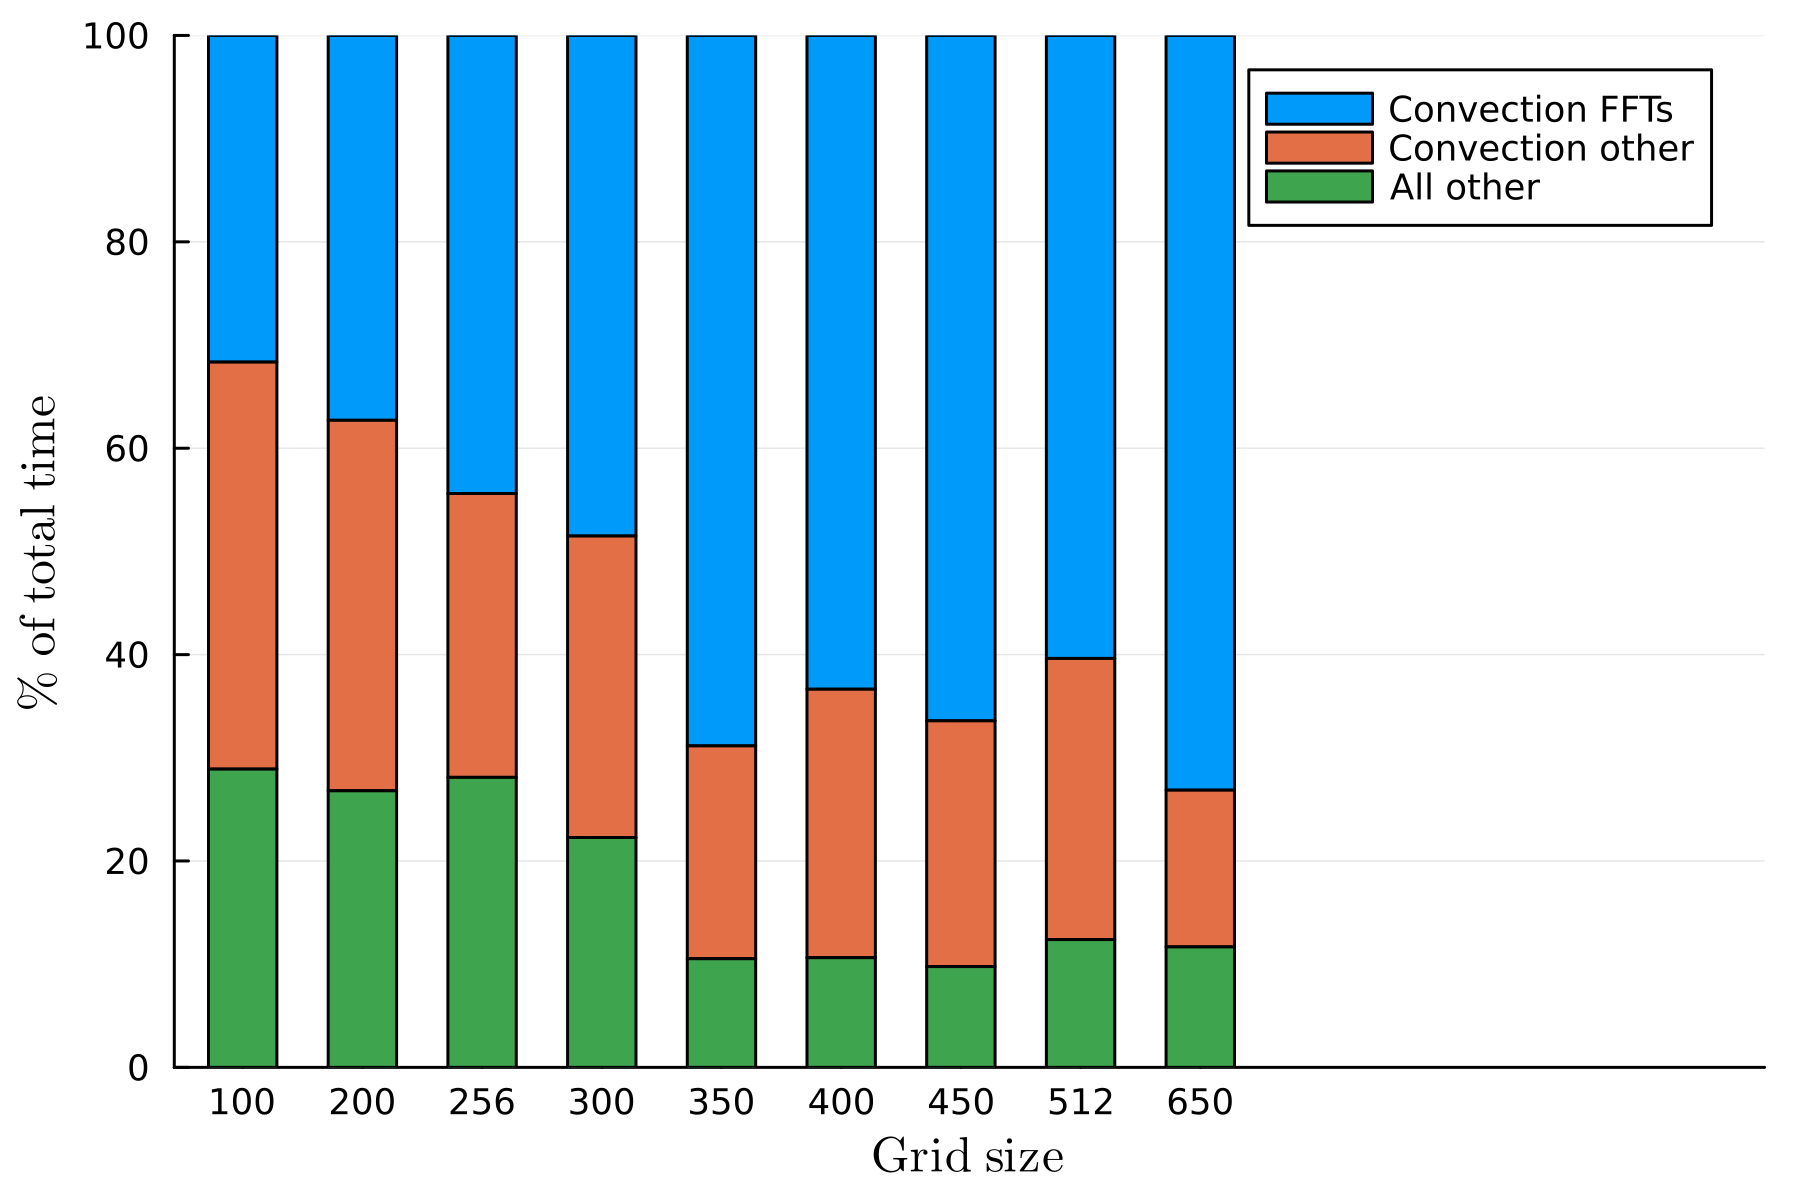

In [65]:
#bar_labels = ["$(convert(Int64, i * 2 / 3))x$(convert(Int64, i * 2 / 3))" for i in sizes_isotest]
bar_labels=["$(convert(Int64, i * 2/ 3))" for i in sizes_isotest]
spacing = 0.4
x_pos = LinRange(spacing, spacing * (size(sizes_isotest, 1) - 1), size(sizes_isotest, 1))


groupedbar(x_pos, rel_prcnt_times .* 100, bar_position=:stack, labels=["Convection FFTs" "Convection other" "All other"], bar_width=0.2, xticks=(x_pos, bar_labels), ylimits=(0, 100),
    xlimits=(0.2, 4.85), legend=:topright, dpi=300)#, aspect_ratio = 0.02)
xlabel!(L"\textsf{Grid\ size}")
ylabel!(L"\textsf{\%\ of\ total\ time}")
#savefig("GPU_prcnt_time.png")

In [35]:
# GPU usage - currently data is only for grid sizes of 30x30 to 650x650

i58_start_lines = [9, 33, 57, 80, 103, 127, 151, 174, 198, 222, 260, 294, 349, 397, 538, 697] # lines where benchmark on i58 starts 
i58_end_lines = [32, 55, 79, 102, 126, 149, 173, 197, 221, 259, 292, 347, 395, 525, 681, 873] # lines where benchmark on i58 ends
i58_lens = i58_end_lines .- i58_start_lines
i5X_start_lines = [15, 58, 100, 141, 182, 224, 266, 309, 352, 395, 441, 495, 550, 597, 743, 903] # lines where benchmark on i5X starts 
i5X_end_lines =   [56, 98, 140, 181, 223, 265, 307, 350, 393, 439, 493, 547, 594, 724, 883, 1076] # lines where benchmark on i5X ends
i5X_lens = i5X_end_lines .- i5X_start_lines;
# start index is line 1, not line 0



In [36]:
i58_usage_filename = "$(GPU_usage_dir)/USAGE_i58.log"
i5X_usage_filename = "$(GPU_usage_dir)/USAGE_i5X.log";
i58_usage_file = readlines(i58_usage_filename);
i5X_usage_file = readlines(i5X_usage_filename);

i58_usage = Array(repeat([0.0], size(i58_usage_file, 1)))
i5X_usage = Array(repeat([0.0], size(i5X_usage_file, 1)))

for i in 1:size(i58_usage, 1)
    i58_usage[i] = parse(Int64, split(split(i58_usage_file[i], "- ")[2], " ")[1])
end;

for i in 1:size(i5X_usage, 1)
    i5X_usage[i] = parse(Int64, split(split(i5X_usage_file[i], "- ")[2], " ")[1])
end;

#parse(Int64, split(split(i58_usage_file[1], "- ")[2], " ")[1])


In [37]:
function calc_usage_mean(line_start::Array, line_end::Array, data::Array)
    mean_arr = repeat([0.0], size(line_start, 1))
    for i in 1:size(line_start, 1)
        temp_arr = data[line_start[i]:line_end[i]]
        mean_arr[i] = sum(temp_arr) / size(temp_arr, 1)
    end;
    return mean_arr
end;

In [38]:
i58_usage_mean = calc_usage_mean(i58_start_lines, i58_end_lines, i58_usage);
i5X_usage_mean = calc_usage_mean(i5X_start_lines, i5X_end_lines, i5X_usage);

In [39]:
i58_usage_mean

16-element Vector{Float64}:
  38.208333333333336
  40.47826086956522
  45.17391304347826
  44.04347826086956
  50.208333333333336
  51.82608695652174
  57.82608695652174
  69.91666666666667
  75.29166666666667
  97.84210526315789
  97.9090909090909
  99.0
 100.0
 100.0
  98.64583333333333
 100.0

In [40]:
lens1 = [30, 70, 80, 100, 128, 160, 200, 256, 300, 350, 400, 450, 512, 650, 800, 896];
lens2 = [30, 70, 80, 100, 128, 160, 200, 256, 300, 350, 400, 450, 512, 650, 800, 896];

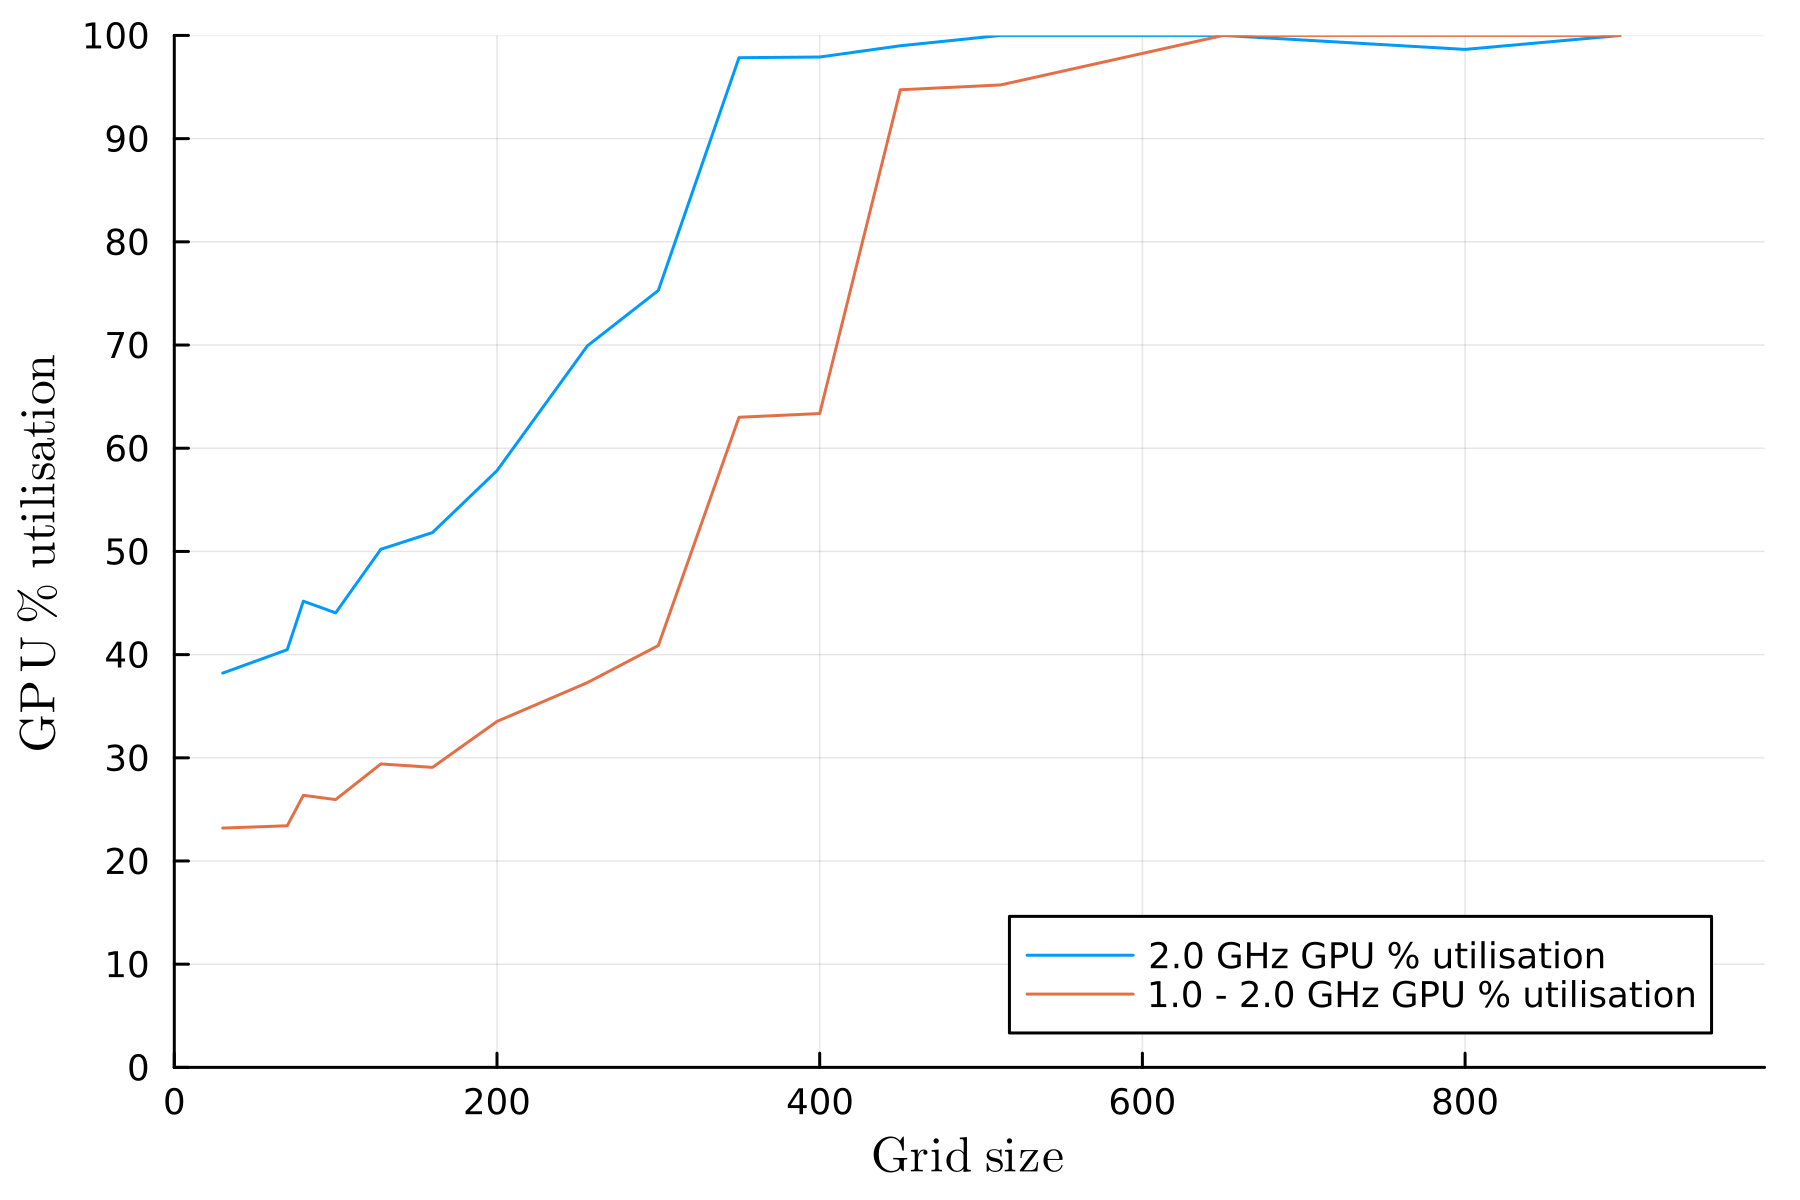

In [41]:
right_lim = 1.1 * maximum(lens1)

plot(lens1, i58_usage_mean, label="2.0 GHz GPU % utilisation", ylimits=(0, 100), yticks=(LinRange(0, 100, 11)), xlimits=(0, right_lim), dpi=300)
plot!(lens2, i5X_usage_mean, label="1.0 - 2.0 GHz GPU % utilisation", legend=:bottomright)
xlabel!(L"\textsf{Grid\ size}")
ylabel!(L"\textsf{GPU\ \%\ utilisation}")
#savefig("GPU_prcnt_usage.png")

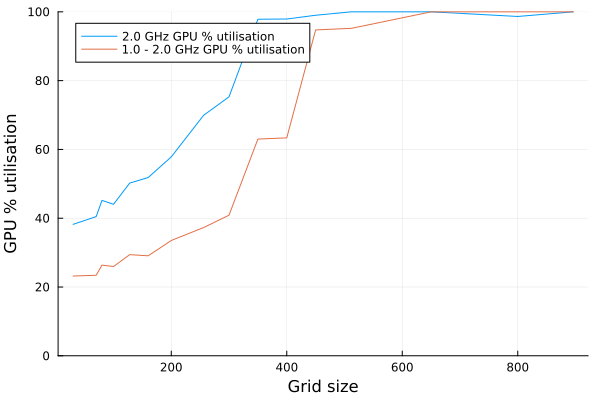

In [42]:
plot(lens, i58_usage_mean, label="2.0 GHz GPU % utilisation", ylimits=(0, 100))
plot!(lens, i5X_usage_mean, label="1.0 - 2.0 GHz GPU % utilisation")
xlabel!("Grid size")
ylabel!("GPU % utilisation")